<a href="https://colab.research.google.com/github/Pains1/Machine-learning-with-python-projects/blob/machine-learning/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  #for data manipulation and analysis
import numpy as np  #for numerical computing
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns  #for data visualization
from sklearn.preprocessing import StandardScaler  #for standardizing of data to common range
from sklearn.model_selection import train_test_split #splitting data into train and test data
from sklearn import svm  #for support vector machine model
from sklearn.metrics import accuracy_score  #for checking accuracy of the model

In [9]:
diabetes= pd.read_csv("diabetes (1).csv")

In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes.shape

(768, 9)

In [13]:
diabetes['Outcome'].value_counts()/len(diabetes)

,count
Outcome,
0,0.651042
1,0.348958


In [14]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: ylabel='Frequency'>

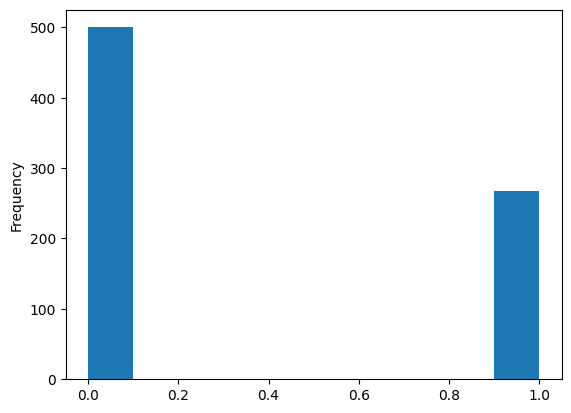

In [25]:
diabetes['Outcome'].plot.hist()

from outcome

0 --> Non Diabetic

1 --> Diabetic

In [26]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [27]:
diabetes.groupby('Outcome').std()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.017185,26.141200,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
1,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254


In [29]:
#Separating data and labels
X = diabetes.drop(columns= 'Outcome', axis= 1)   #drop the Outcome column and put rest of the data in x
Y = diabetes['Outcome']      #put the Outcome column in Y


In [30]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [31]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Standardization of Data**

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [36]:
standardized_data= scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [37]:
standardized_data.shape

(768, 8)

In [38]:
X= standardized_data
Y= diabetes['Outcome']

Training and testing of data

In [39]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size= 0.2, stratify=Y,random_state=2)

In [40]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [41]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


training of Data

In [42]:
classify = svm.SVC(kernel= 'linear')

In [43]:
#training svm classifier
classify.fit(X_train,Y_train)

SVC(kernel='linear')

#Model Evaluation and also Accuracy Score

In [47]:
X_train_prediction = classify.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data is: ',training_data_accuracy )

Accuracy score of the training data is:  0.7866449511400652


In [48]:
X_test_prediction = classify.predict(X_test)
test_data_accuracy_for_Y = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data is :', test_data_accuracy_for_Y)

Accuracy score of the test data is : 0.7727272727272727


Making a predictive system

In [55]:
input=(8,99,84,0,0,35.4,0.388,50)
#change input to a numpy array
input_as_array = np.asarray(input)

#reshape the array for 1 instance ..because the model expect 768 arrays
input_reshaped = input_as_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_reshaped)
print(std_data)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

prediction = classify.predict(std_data)
print(prediction)


[[ 1.23388019 -0.68523633  0.77001375 -1.28821221 -0.69289057  0.43246741
  -0.25331639  1.4259954 ]]
The person is not diabetic
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
